In [15]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.insert(0, '../')
%matplotlib inline

In [8]:
PATH_PATTERN = '../data/%s_mobike_grid_week_0717_0721_street_std_mean_1000_1000.csv'

In [9]:
nb_df = pd.read_csv(PATH_PATTERN % 'nb')

In [10]:
nb_df

,lat,lng,food,hotel,shopping,life_service,beauty,tourist,entertainment,sports,...,light_dis,num_pois,poi_entropy,num_highway,num_railway,highway_entropy,subway_dis,shop_center_dis,shop_center_level,mobike
0,29.805,121.455,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,7.1181,3.0,1.098612,0.0,0.0,0.000000,2.4241,9.8611,1.0,2.983333
1,29.805,121.465,0.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,...,6.2080,21.0,1.814644,0.0,0.0,0.000000,2.1266,8.9470,1.0,6.208333
2,29.805,121.475,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,...,5.3177,30.0,1.698011,0.0,0.0,0.000000,1.8532,8.0449,1.0,8.083333
3,29.805,121.485,0.0,0.0,2.0,4.0,0.0,1.0,0.0,0.0,...,4.4590,27.0,1.412575,6.0,0.0,0.636514,1.2463,7.1595,1.0,5.166667
4,29.805,121.495,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,3.6541,26.0,1.409040,2.0,0.0,-0.000000,1.2402,6.2978,1.0,10.725000
5,29.805,121.505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.9476,0.0,0.000000,1.0,0.0,-0.000000,1.8408,5.4709,1.0,9.691667
6,29.805,121.515,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,...,2.4269,40.0,0.797447,0.0,0.0,0.000000,2.4239,4.6974,1.0,5.325000
7,29.805,121.525,0.0,0.0,6.0,4.0,0.0,1.0,0.0,0.0,...,2.2264,59.0,1.140514,11.0,0.0,-0.000000,3.0102,4.0082,1.0,10.116667
8,29.805,121.535,3.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,...,2.4269,44.0,1.925040,3.0,0.0,-0.000000,3.7440,3.4542,1.0,10.083333
9,29.805,121.545,4.0,0.0,4.0,2.0,2.0,0.0,1.0,0.0,...,2.9476,33.0,2.282987,79.0,0.0,0.924311,4.3092,3.1086,1.0,3.216667


In [130]:
def print_google_map_code(df, target_name='mobike'):
    for index, row in df.iterrows():
        if row['mobike'] > 0:
            print('{location: new google.maps.LatLng(%s, %s), weight: %s},' % (row['lat'], row['lng'], row[target_name]))

## City NB Pred Plot

In [135]:
from const import CITY_BLOCK_DICT

def slice_city_values(values, lat, lng, wd):
    values = values.reshape(lat, lng)
    values = values[wd: lat-wd, wd: lng-wd]
    return values.ravel()

In [136]:
def get_shrink_area(city_name, window=5):
    wd = window // 2
    c_lat, c_lng, _ = CITY_BLOCK_DICT[city_name]
    city_df = pd.read_csv(PATH_PATTERN % city_name)
    lats = slice_city_values(city_df.lat.values, c_lat, c_lng, wd)
    lngs = slice_city_values(city_df.lng.values, c_lat, c_lng, wd)
    bikes = slice_city_values(city_df.mobike.values, c_lat, c_lng, wd)
    
    bikes = bikes / np.sum(bikes) * 100.0
    return pd.DataFrame({
        'lat': lats,
        'lng': lngs,
        'mobike': bikes
    })

In [137]:
mobike_locations = get_shrink_area('nb')

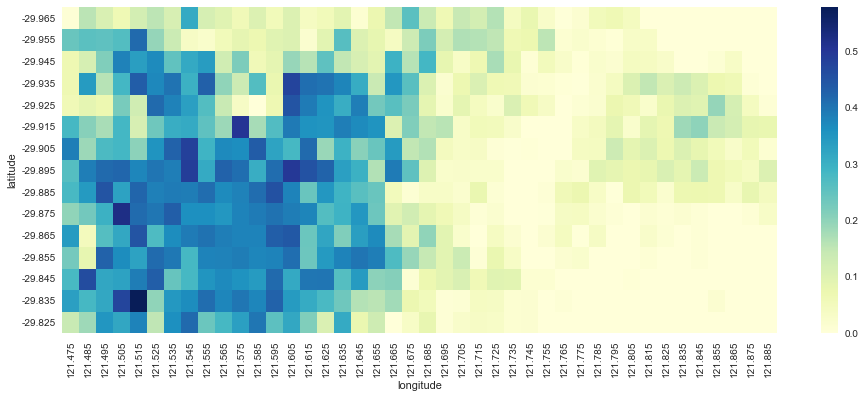

In [138]:
plt.figure(figsize=(16, 6))
mobike_locations['neg_lat'] = mobike_locations['lat'].apply(lambda x: (-1) * x)
mobike_distribution = mobike_locations.pivot("neg_lat", "lng", "mobike")
sns.heatmap(mobike_distribution, cmap="YlGnBu")
plt.xlabel('longitude')
plt.ylabel('latitude')

In [139]:
bj_nb_pred = np.load('/Users/towardsun/Documents/Workspace/python/mobike-dist/logs/903454f6-317a-11e8-85b0-6a00022fd770/y_pred.npy')
# bj_nb_pred = bj_nb_pred / np.sum(bj_nb_pred) * 100.0

In [140]:
mobike_locations.shape

(630, 4)

In [141]:
mobike_locations['pred'] = bj_nb_pred

In [142]:
print_google_map_code(mobike_locations, target_name='pred')

{location: new google.maps.LatLng(29.825, 121.475), weight: 26.742773056},
{location: new google.maps.LatLng(29.825, 121.485), weight: 31.271024704},
{location: new google.maps.LatLng(29.825, 121.495), weight: 36.0899658203},
{location: new google.maps.LatLng(29.825, 121.505), weight: 38.8348999023},
{location: new google.maps.LatLng(29.825, 121.515), weight: 39.1025733948},
{location: new google.maps.LatLng(29.825, 121.525), weight: 38.797164917},
{location: new google.maps.LatLng(29.825, 121.535), weight: 40.5899124146},
{location: new google.maps.LatLng(29.825, 121.545), weight: 42.9816055298},
{location: new google.maps.LatLng(29.825, 121.555), weight: 45.142364502},
{location: new google.maps.LatLng(29.825, 121.565), weight: 44.7070388794},
{location: new google.maps.LatLng(29.825, 121.575), weight: 44.0293045044},
{location: new google.maps.LatLng(29.825, 121.585), weight: 43.8360710144},
{location: new google.maps.LatLng(29.825, 121.595), weight: 45.0662155151},
{location: new g

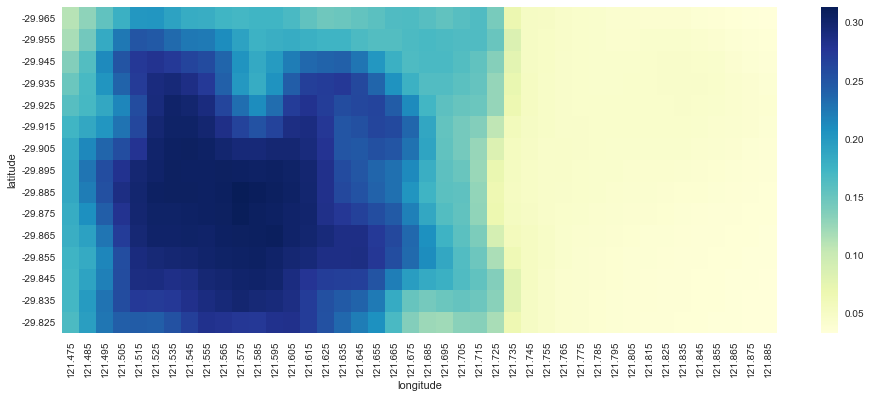

In [100]:
plt.figure(figsize=(16, 6))
mobike_locations['neg_lat'] = mobike_locations['lat'].apply(lambda x: (-1) * x)
mobike_distribution = mobike_locations.pivot("neg_lat", "lng", "pred")
sns.heatmap(mobike_distribution, cmap="YlGnBu")
plt.xlabel('longitude')
plt.ylabel('latitude')

In [132]:
sh_nb_pred = np.load('/Users/towardsun/Documents/Workspace/python/mobike-dist/logs/60b7ea1e-3185-11e8-b8b5-6a00022fd770/y_pred.npy')
# sh_nb_pred = sh_nb_pred / np.sum(sh_nb_pred) * 100.0

In [133]:
mobike_locations['pred'] = sh_nb_pred

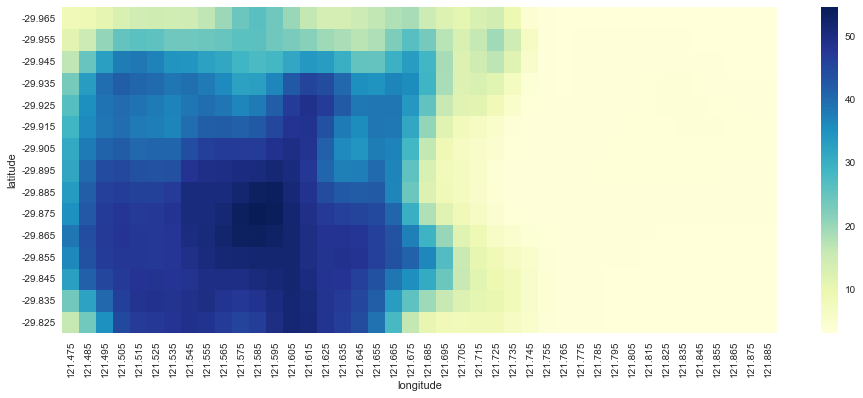

In [134]:
plt.figure(figsize=(16, 6))
mobike_locations['neg_lat'] = mobike_locations['lat'].apply(lambda x: (-1) * x)
mobike_distribution = mobike_locations.pivot("neg_lat", "lng", "pred")
sns.heatmap(mobike_distribution, cmap="YlGnBu")
plt.xlabel('longitude')
plt.ylabel('latitude')

## City BJ Pred Plot

In [110]:
mobike_locations = get_shrink_area('bj')

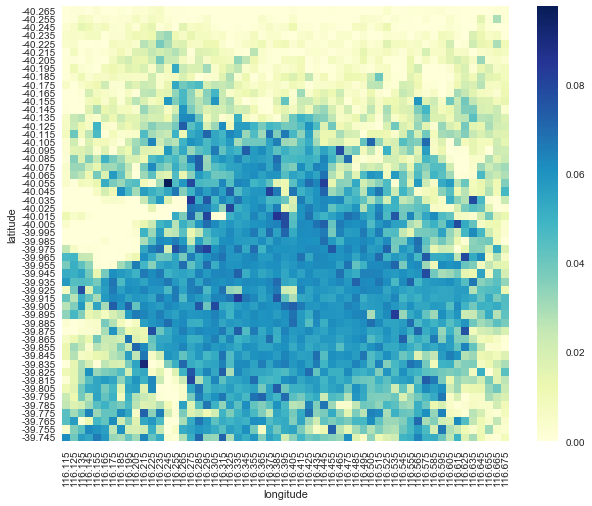

In [111]:
plt.figure(figsize=(10, 8))
mobike_locations['neg_lat'] = mobike_locations['lat'].apply(lambda x: (-1) * x)
mobike_distribution = mobike_locations.pivot("neg_lat", "lng", "mobike")
sns.heatmap(mobike_distribution, cmap="YlGnBu")
plt.xlabel('longitude')
plt.ylabel('latitude')

In [116]:
sh_bj_pred = np.load('/Users/towardsun/Documents/Workspace/python/mobike-dist/logs/4ed4806c-3189-11e8-9737-6a00022fd770/y_pred.npy')
sh_bj_pred = sh_bj_pred / np.sum(sh_bj_pred) * 100.0

In [118]:
mobike_locations['pred'] = sh_bj_pred

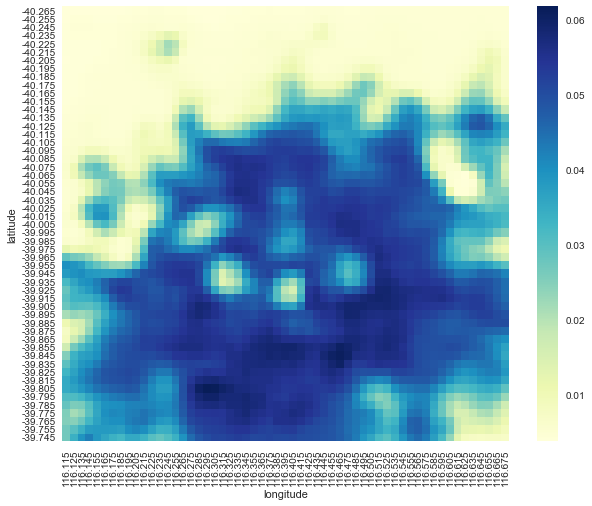

In [119]:
plt.figure(figsize=(10, 8))
mobike_locations['neg_lat'] = mobike_locations['lat'].apply(lambda x: (-1) * x)
mobike_distribution = mobike_locations.pivot("neg_lat", "lng", "pred")
sns.heatmap(mobike_distribution, cmap="YlGnBu")
plt.xlabel('longitude')
plt.ylabel('latitude')